In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jscon import make_image as mk_image
from jscon import make_stars as mk_star


In [2]:
## path to output file for random stars
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/random_stars.csv"

# Load catalog
catalog_name = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1027/gns+ohsawa_bright_stars.csv"
catalog = mk_image.get_catalog_info_for_making_stars(catalog_name)


/opt/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


In [3]:
ohsawa_catalog_name = "/Volumes/G-DRIVE/jasmine/working_dir/ohsawa_catalog/all_table.csv"
ohsawa_catalog =pd.read_csv(ohsawa_catalog_name)


In [4]:
# Latititude Shift from (0, 360) -> (-180, 180)
catalog_shifted = catalog
mask_shifted = catalog_shifted["gal_l"]>180
catalog_shifted["gal_l"][mask_shifted] -=360

ohsawa_catalog_shifted = ohsawa_catalog
mask_shifted = ohsawa_catalog["glon"] > 180
ohsawa_catalog_shifted["glon"][mask_shifted] -=360

<ipython-input-4-7e1518a157a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohsawa_catalog_shifted["glon"][mask_shifted] -=360


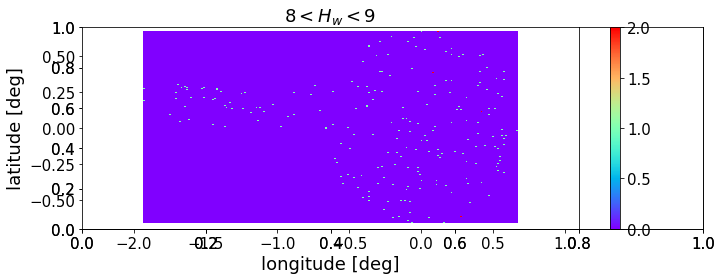

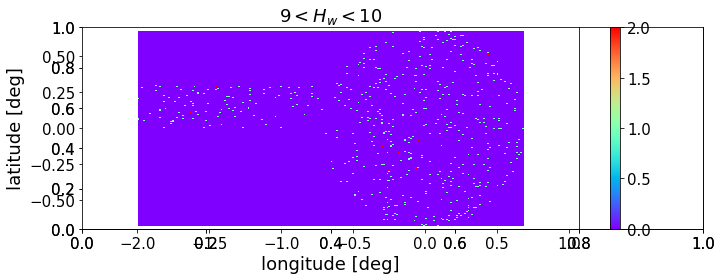

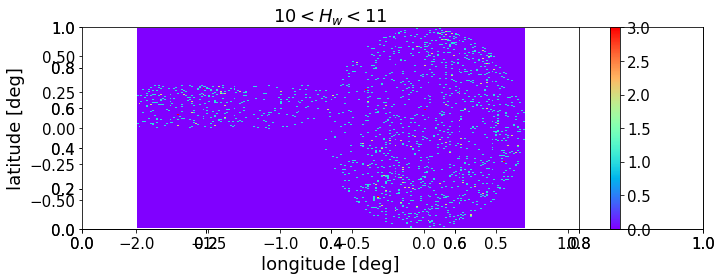

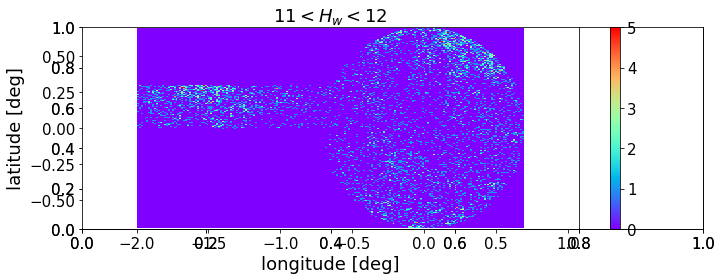

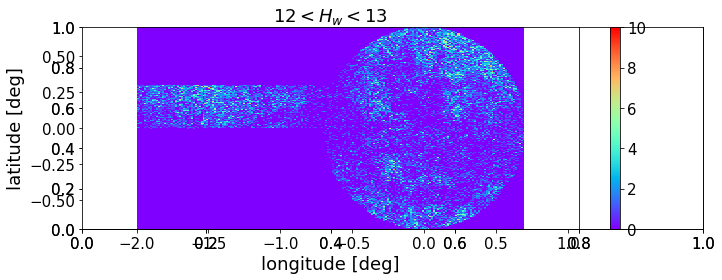

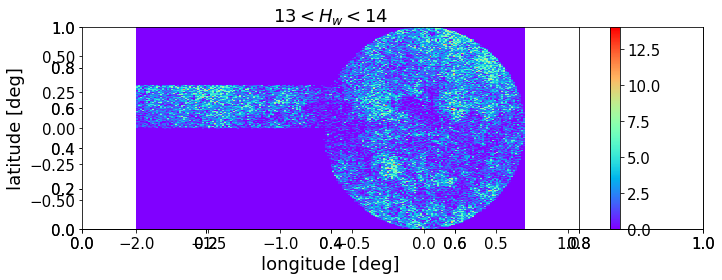

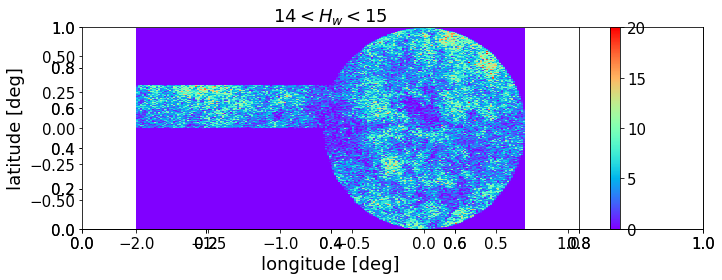

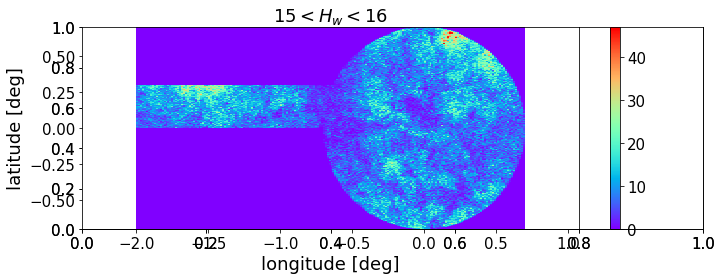

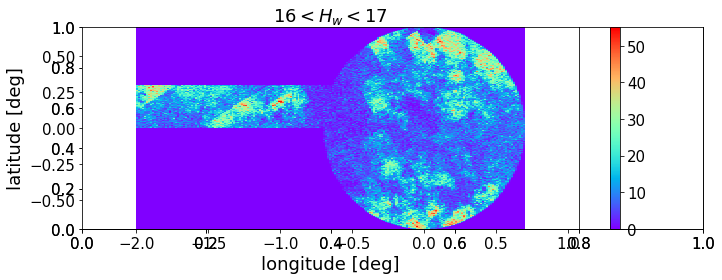

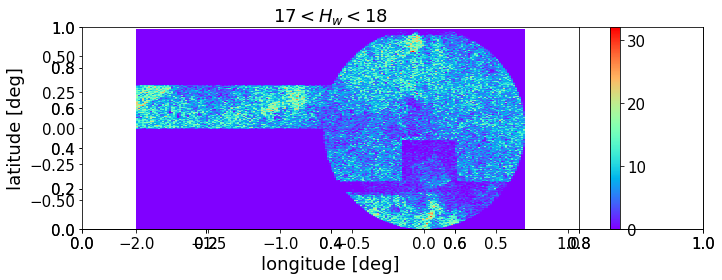

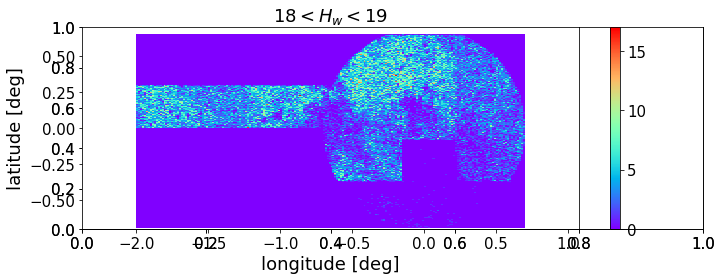

In [11]:
from scipy import stats
import matplotlib as mpl
import matplotlib.patches as patches

fig_out = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/"

label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

hwmag = ohsawa_catalog_shifted["phot_hw_mag"]

mags = np.arange(8, 19)

for (i, mag) in enumerate(mags):
    mag_lw = mag
    mag_up = mag+1
    mask_mag = ( hwmag> mag_lw) * (mag_up > hwmag)
    stars = ohsawa_catalog_shifted[mask_mag]
    H, yedges, xedges = np.histogram2d( stars["glat"], stars["glon"],bins=200)
    #fig = plt.figure(figsize = (10,4))
    fig, ax = plt.subplots(figsize = (10,4))
    ax = plt.axes()
    plt.axes().set_aspect('equal', 'datalim')
    plt.pcolormesh(xedges, yedges, H, cmap='rainbow')
    plt.colorbar()
    r = patches.Rectangle(xy=(-0.5, -0.1), width=1, height=0.7)#, ec='#000000', fill=False)
    ax.add_patch(r)
    
    plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = 18)
    plt.ylim(-0.7, 0.7)
    plt.xlabel("longitude [deg]", fontsize = 18)
    plt.ylabel("latitude [deg]", fontsize = 18)
    plt.tight_layout()

    plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps/Hw%d_%d.png" % (mag_lw, mag_up),\
               dpi = 200)
    plt.show()
    

In [12]:
for (i, mag) in enumerate(mags):
    mag_lw = mag
    mag_up = mag+1    
    print(r"\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw%d_%d.png}" % (mag_lw, mag_up))


\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw8_9.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw9_10.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw10_11.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw11_12.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw12_13.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw13_14.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw14_15.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw15_16.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw16_17.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw17_18.png}
\includegraphics[width=0.48 \linewidth]{./fig/mag_seps/Hw18_19.png}


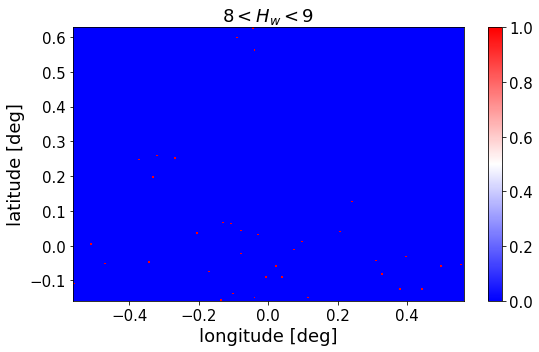

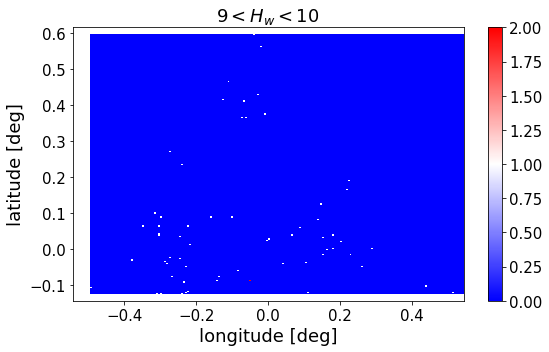

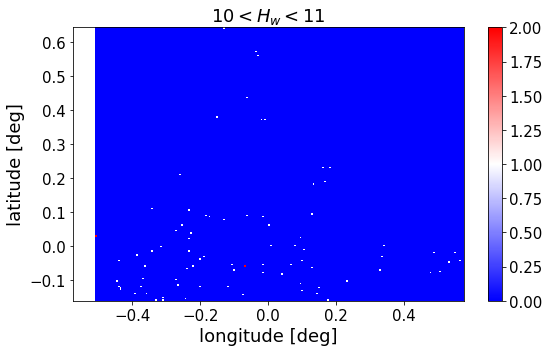

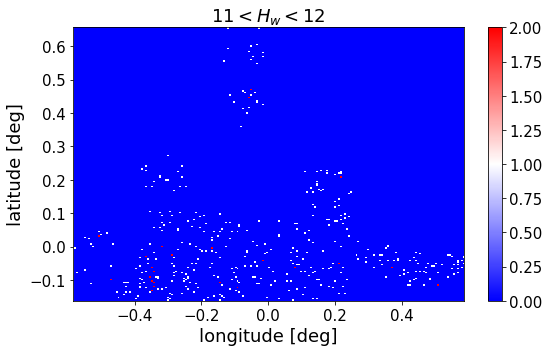

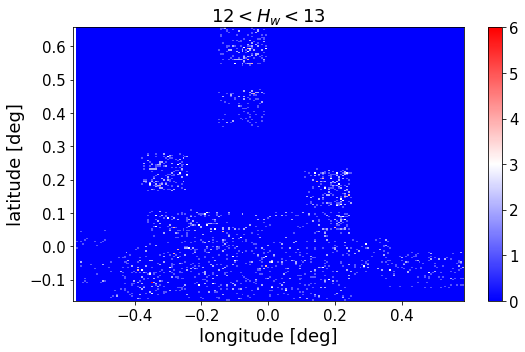

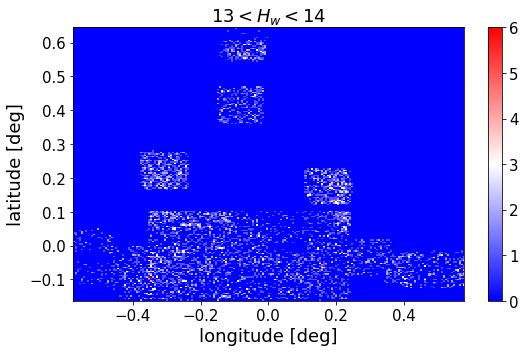

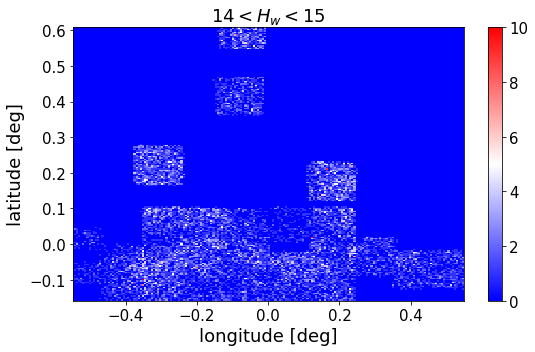

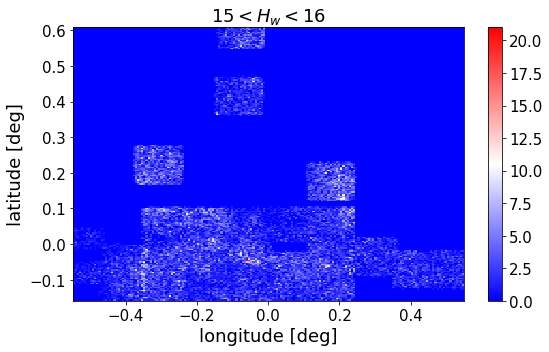

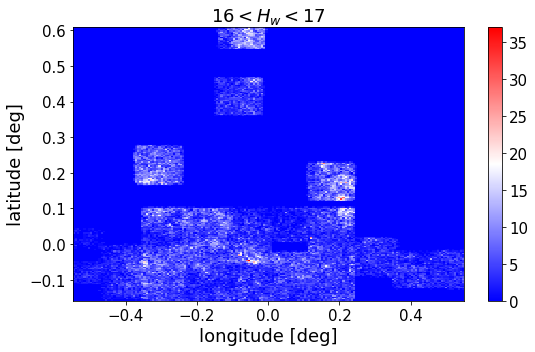

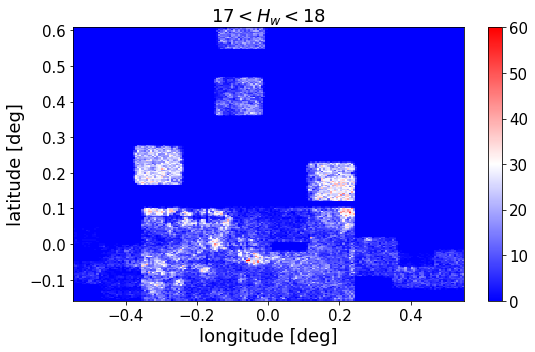

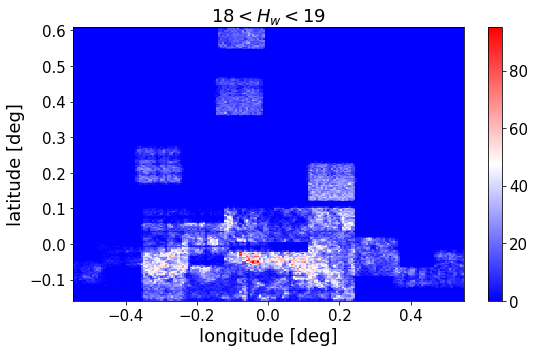

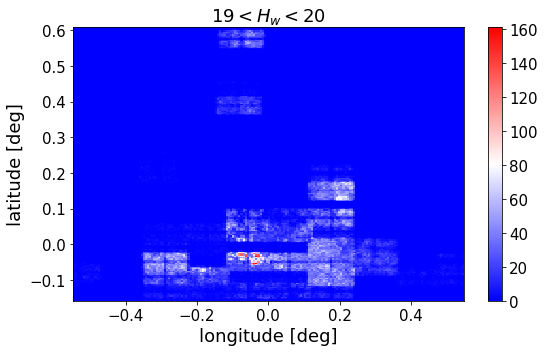

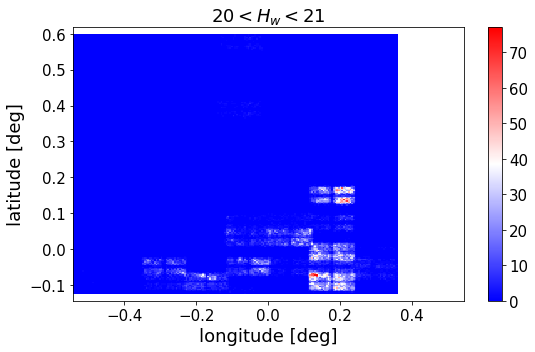

In [13]:
from scipy import stats
import matplotlib as mpl

fig_out = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/"

label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

hwmag =  catalog_shifted["hwmag"]

mags = np.arange(8, 21)

for (i, mag) in enumerate(mags):
    mag_lw = mag
    mag_up = mag+1
    mask_mag = ( hwmag> mag_lw) * (mag_up > hwmag)
    stars = catalog_shifted[mask_mag]
    H, yedges, xedges = np.histogram2d(stars["gal_b"], stars["gal_l"],bins=200)
    fig = plt.figure(figsize = (8,5))
    plt.axes().set_aspect('equal', 'datalim')
    plt.pcolormesh(xedges, yedges, H, cmap='bwr')
    plt.colorbar()
    plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = 18)
    plt.xlim(-0.5, 0.5)
    plt.xlabel("longitude [deg]", fontsize = 18)
    plt.ylabel("latitude [deg]", fontsize = 18)
    plt.tight_layout()
    plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/Hw%d_%d.png" % (mag_lw, mag_up),\
               dpi = 500)
    plt.show()
    

In [8]:
for (i, mag) in enumerate(mags):
    mag_lw = mag
    mag_up = mag+1    
    print(r"\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw%d_%d.png}" % (mag_lw, mag_up))


\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw8_9.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw9_10.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw10_11.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw11_12.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw12_13.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw13_14.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw14_15.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw15_16.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw16_17.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw17_18.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw18_19.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw19_20.png}
\includegraphics[width=0.32 \linewidth]{./fig/mag_seps_gns/Hw20_21.png}


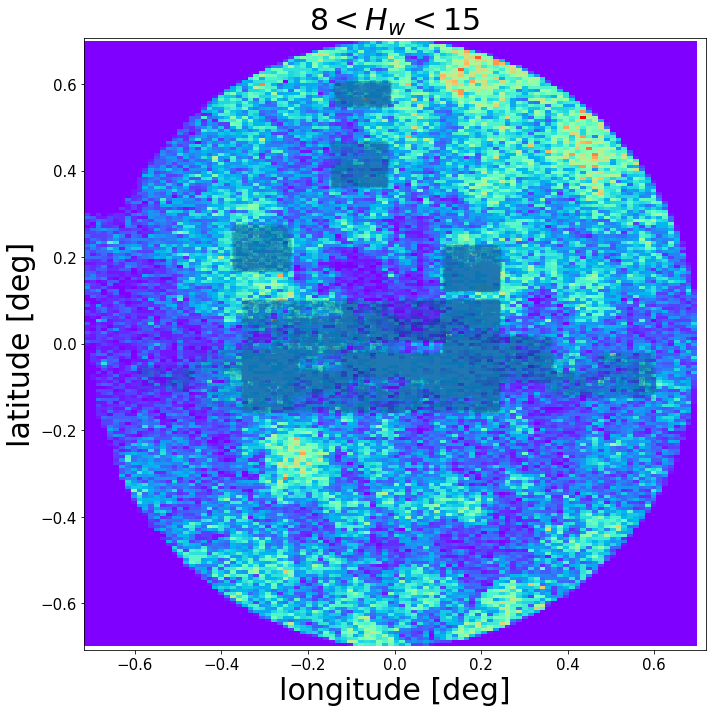

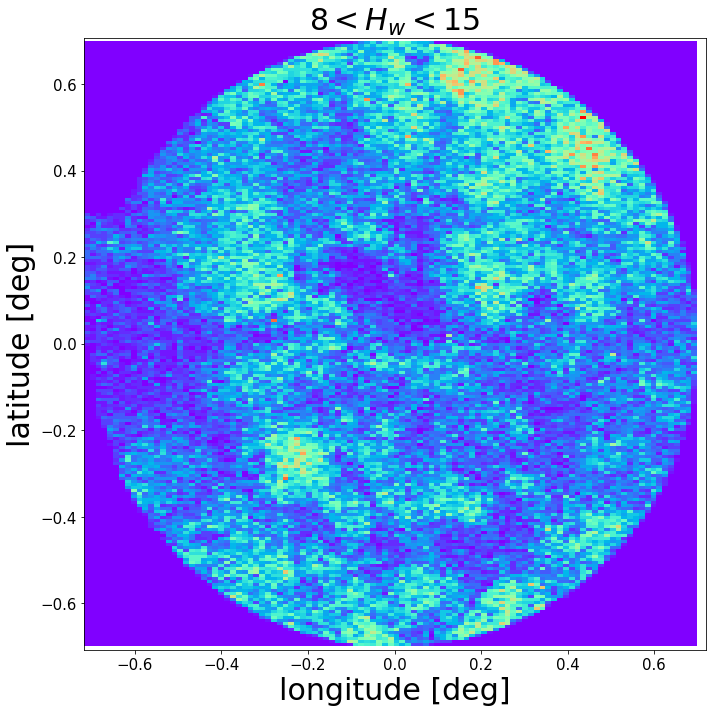

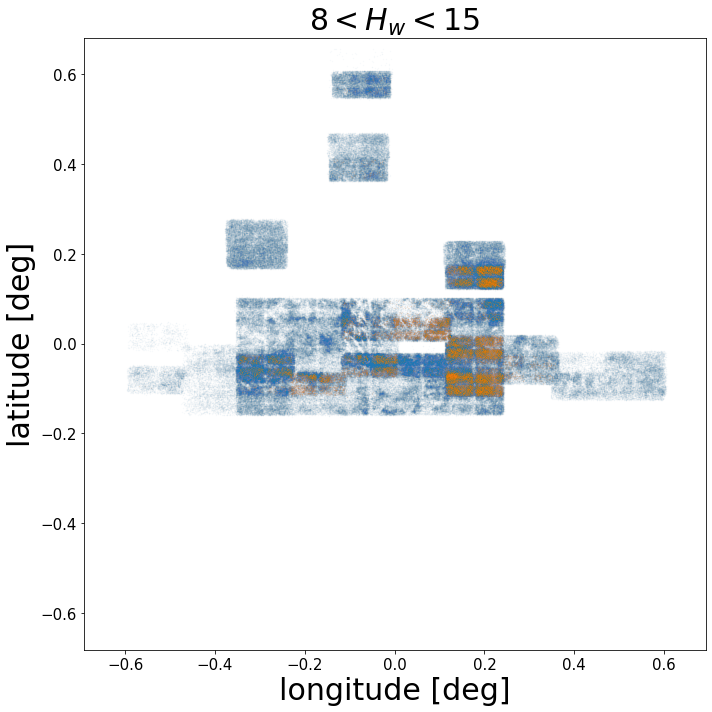

In [97]:
mag_lw = 8
mag_up = 15
fontsize = 30
figsize = (10, 10)
mask_mag = (  ohsawa_catalog_shifted["phot_hw_mag"]> mag_lw) * (mag_up >  ohsawa_catalog_shifted["phot_hw_mag"])
stars = ohsawa_catalog_shifted[mask_mag]
H, yedges, xedges = np.histogram2d( stars["glat"], stars["glon"],bins=200)
fig = plt.figure(figsize = figsize )
plt.axes().set_aspect('equal', 'datalim')
plt.pcolormesh(xedges, yedges, H, cmap='rainbow')
plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.0005, alpha = 0.7)
#plt.colorbar()
plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = fontsize )
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
plt.xlabel("longitude [deg]", fontsize = fontsize )
plt.ylabel("latitude [deg]", fontsize = fontsize )
plt.tight_layout()
plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/hw14_15_overplot_with_gns.png" ,\
               dpi = 500)
plt.show()
fig = plt.figure(figsize = figsize )
plt.axes().set_aspect('equal', 'datalim')
plt.pcolormesh(xedges, yedges, H, cmap='rainbow')
#plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.001, alpha = 0.5)
plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = fontsize )
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
plt.xlabel("longitude [deg]", fontsize = fontsize )
plt.ylabel("latitude [deg]", fontsize = fontsize )
plt.tight_layout()
plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/hw14_15_zoom.png" ,\
               dpi = 500)
plt.show()

fig = plt.figure(figsize = figsize )
plt.axes().set_aspect('equal', 'datalim')
#plt.pcolormesh(xedges, yedges, H, cmap='gray')
mask_hwmag = catalog_shifted["hwmag"]>20
plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.0005, alpha = 0.5)

plt.scatter(catalog_shifted["gal_l"][mask_hwmag], catalog_shifted["gal_b"][mask_hwmag], s = 0.001, label="Hwmag>20")

plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = fontsize )
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
plt.xlabel("longitude [deg]", fontsize = fontsize )
plt.ylabel("latitude [deg]", fontsize = fontsize )
plt.tight_layout()
plt.show()



In [149]:

def plot_square(l_min, l_max, b_min, b_max, lw = 4, color="k"):
    plt.plot([l_min, l_max], [b_min, b_min], color=color, lw = lw)
    plt.plot([l_min, l_max], [b_max, b_max], color=color, lw = lw)
    plt.plot([l_min, l_min], [b_min, b_max], color=color, lw = lw)
    plt.plot([l_max, l_max], [b_min, b_max], color=color, lw = lw)


def plot_zoom(catalog, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose, title="A", file_fig_head ="test", comp_catalog = None):


    ## Zoom-up view of field with faint stars
    #plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.0001)
    mask_hwmag = catalog["hwmag"]>18
    plt.scatter(catalog["gal_l"][mask_hwmag], catalog["gal_b"][mask_hwmag], s = 0.01, label="Hwmag>18")
    mask_hwmag_bright = catalog["hwmag"]<10
    plt.scatter(catalog["gal_l"][mask_hwmag_bright], catalog["gal_b"][mask_hwmag_bright], label="Hwmag<10")#, s = 1)
    plot_square(l_min_choose, l_max_choose, b_min_choose, b_max_choose, lw =2)

    plt.xlim(l_min_plot, l_max_plot)
    plt.ylim(b_min_plot, b_max_plot)
    plt.xlabel("gal l", fontsize = 18)
    plt.ylabel("gal b", fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.legend()
    plt.tight_layout()
    plt.savefig(file_fig_head + "_dist.png", dpi = 200)
    plt.show()
    
    area = (b_max_choose - b_min_choose ) * (l_max_choose - l_min_choose ) * 3600 * 3600
    bins = np.arange(8, 22)
    mask_stars_for_learn = (catalog["gal_l"]>l_min_choose) * (catalog["gal_l"]<l_max_choose)* (catalog["gal_b"]>b_min_choose) * (catalog["gal_b"]<b_max_choose)
    catalog_stars_for_learn = catalog[mask_stars_for_learn]
    (n, bins, patches) =plt.hist(catalog_stars_for_learn["hwmag"], bins =bins, weights= (1/area)* np.ones_like(catalog_stars_for_learn["hwmag"]), ec = "black")
    if comp_catalog is not None:
        mask_stars_for_learn_comp = (comp_catalog["glon"]>l_min_choose) * (comp_catalog["glon"]<l_max_choose)* (comp_catalog["glat"]>b_min_choose) * (comp_catalog["glat"]<b_max_choose)
        plt.hist(comp_catalog[mask_stars_for_learn_comp]["phot_hw_mag"], bins =bins, weights= (1/area)* np.ones_like(comp_catalog[mask_stars_for_learn_comp]["phot_hw_mag"]),log = True,  ec = "black")
    plt.xticks([8, 10, 12, 14, 16, 18, 20]) 
    plt.xlabel("$H_{w}$", fontsize = 18)
    plt.ylabel("Stellar density [$1/arcsec^2$]", fontsize = 18)    
    plt.title(title, fontsize = 18)
    plt.ylim(10**-6, 0.2)
    plt.tight_layout()
    plt.savefig(file_fig_head + "_hist.png", dpi = 200)
    plt.show()
    bins_add = bins[:len(bins)-1] + 0.5

    return n, bins_add, catalog_stars_for_learn 

from jscon import make_image as mk_image
import os
folder_out ="/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/"
npix = 2000 ### number of pixel for assumed image
pix_arcsec = 0.4 ### pixelscale
wd_for_image = 2000 * 0.4/3600 #deg

<ipython-input-149-897ef68c845a>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-149-897ef68c845a>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_fig_head + "_dist.png", dpi = 200)
/opt/anaconda3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


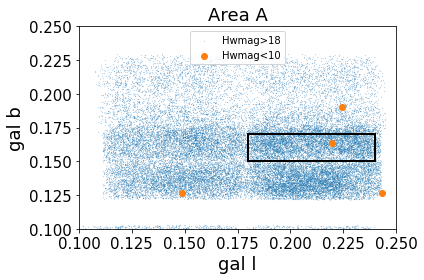

/opt/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


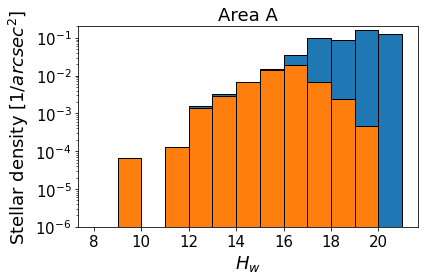

In [150]:
l_min_choose, l_max_choose, b_min_choose, b_max_choose= 0.18, 0.24, 0.15, 0.17
l_min_plot, l_max_plot, b_min_plot, b_max_plot =0.1, 0.25, 0.1, 0.25
file_fig_head = os.path.join(folder_out, "area_a_")
n_A, bins_add_A, catalog_stars_for_learn  = plot_zoom(catalog_shifted, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose,  title="Area A", file_fig_head = file_fig_head, comp_catalog =ohsawa_catalog_shifted)
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/random_catalog/random_stars_A.csv"
df_random_stars = mk_star.make_new_stars( catalog_stars_for_learn["gal_l"],catalog_stars_for_learn["gal_b"] ,catalog_stars_for_learn["hwmag"], 0, wd_for_image, 0,wd_for_image)
df_random_stars.to_csv(file_random_stars)



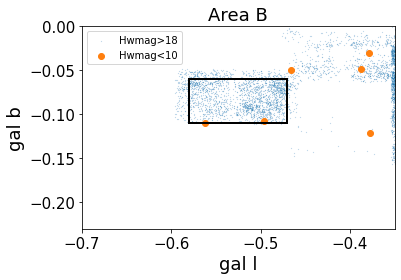

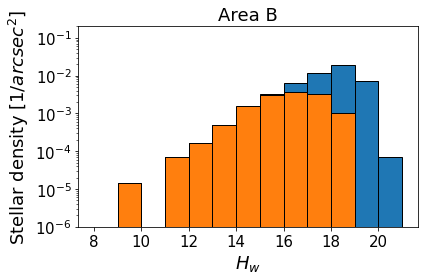

In [151]:
l_min_choose, l_max_choose, b_min_choose, b_max_choose= -0.58,-0.47, -0.11, -0.06
l_min_plot, l_max_plot, b_min_plot, b_max_plot =-0.7, -0.35, -0.23, -0.00
file_fig_head = os.path.join(folder_out, "area_b_")
n_, bins_add_B, catalog_stars_for_learn =plot_zoom(catalog_shifted, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose,title="Area B",file_fig_head = file_fig_head, comp_catalog =ohsawa_catalog_shifted)
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/random_catalog/random_stars_B.csv"
df_random_stars = mk_star.make_new_stars( catalog_stars_for_learn["gal_l"],catalog_stars_for_learn["gal_b"] ,catalog_stars_for_learn["hwmag"], 0, wd_for_image, 0,wd_for_image)
df_random_stars.to_csv(file_random_stars)


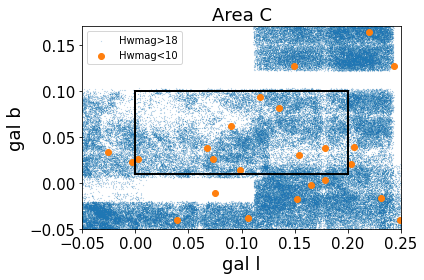

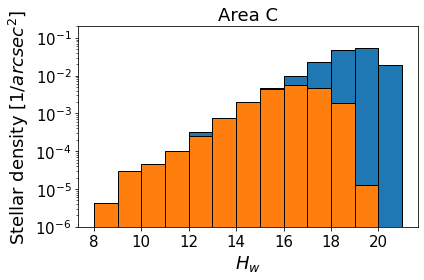

In [152]:
l_min_choose, l_max_choose, b_min_choose, b_max_choose= 0, 0.2, 0.01, 0.1
l_min_plot, l_max_plot, b_min_plot, b_max_plot =-0.05, 0.25, -0.05, 0.17
file_fig_head = os.path.join(folder_out, "area_c_")

n_C, bins_add_C, catalog_stars_for_learn =plot_zoom(catalog_shifted, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose,  title="Area C", file_fig_head = file_fig_head,comp_catalog =ohsawa_catalog_shifted)
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/random_catalog/random_stars_C.csv"
df_random_stars = mk_star.make_new_stars( catalog_stars_for_learn["gal_l"],catalog_stars_for_learn["gal_b"] ,catalog_stars_for_learn["hwmag"], 0, wd_for_image, 0,wd_for_image)
df_random_stars.to_csv(file_random_stars)

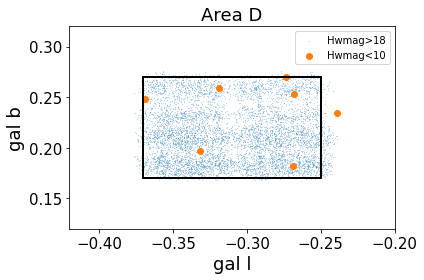

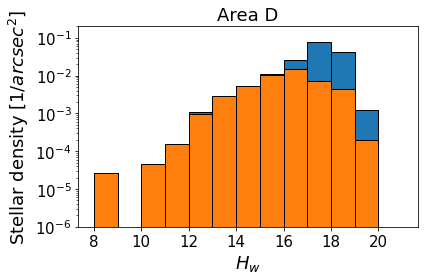

In [153]:
## Zoom-up view of field with faint stars
l_min_choose, l_max_choose, b_min_choose, b_max_choose= -0.37, -0.25, 0.17, 0.27
l_min_plot, l_max_plot, b_min_plot, b_max_plot =-0.42, -0.20, 0.12, 0.32
file_fig_head = os.path.join(folder_out, "area_d_")
n_D, bins_add_D, catalog_stars_for_learn = plot_zoom(catalog_shifted, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose, title="Area D",file_fig_head = file_fig_head,comp_catalog =ohsawa_catalog_shifted)
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/random_catalog/random_stars_D.csv"
df_random_stars = mk_star.make_new_stars( catalog_stars_for_learn["gal_l"],catalog_stars_for_learn["gal_b"] ,catalog_stars_for_learn["hwmag"], 0, wd_for_image, 0,wd_for_image)
df_random_stars.to_csv(file_random_stars)

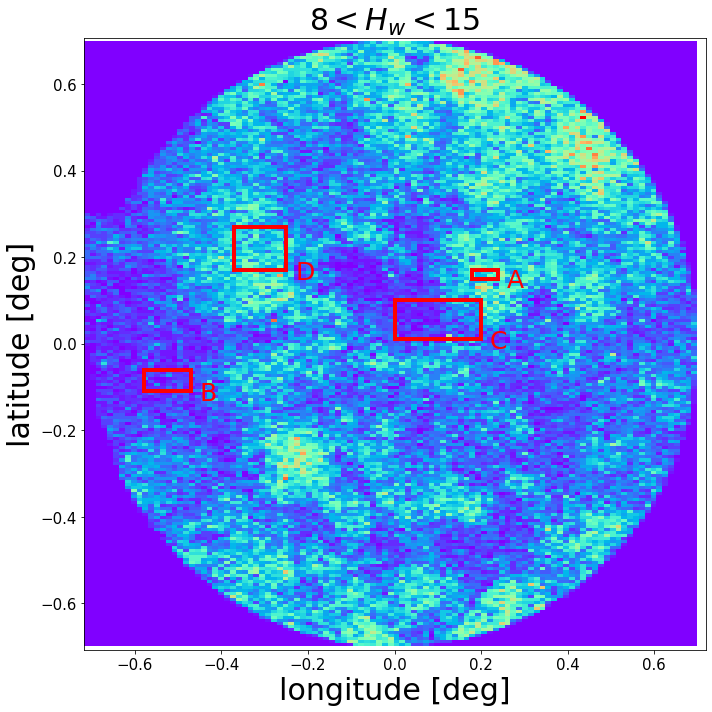

In [140]:
mag_lw = 8
mag_up = 15
fontsize = 30
figsize = (10, 10)
mask_mag = (  ohsawa_catalog_shifted["phot_hw_mag"]> mag_lw) * (mag_up >  ohsawa_catalog_shifted["phot_hw_mag"])
stars = ohsawa_catalog_shifted[mask_mag]
H, yedges, xedges = np.histogram2d( stars["glat"], stars["glon"],bins=200)
fig = plt.figure(figsize = figsize )
plt.axes().set_aspect('equal', 'datalim')
plt.pcolormesh(xedges, yedges, H, cmap='rainbow')
#plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.0005, alpha = 0.7)

color_lw = "r"
lw = 4
l_min_choose, l_max_choose, b_min_choose, b_max_choose= 0.18, 0.24, 0.15, 0.17
plot_square(l_min_choose, l_max_choose, b_min_choose, b_max_choose, color=color_lw , lw =lw)
plt.text(l_max_choose+0.02, b_min_choose-0.02, "A", color= color_lw,fontsize = 25)

l_min_choose, l_max_choose, b_min_choose, b_max_choose= -0.58,-0.47, -0.11, -0.06
plot_square(l_min_choose, l_max_choose, b_min_choose, b_max_choose, color=color_lw , lw =lw)
plt.text(l_max_choose+0.02, b_min_choose-0.02, "B", color= color_lw,fontsize = 25)

l_min_choose, l_max_choose, b_min_choose, b_max_choose= 0, 0.2, 0.01, 0.1
plot_square(l_min_choose, l_max_choose, b_min_choose, b_max_choose, color=color_lw , lw =lw)
plt.text(l_max_choose+0.02, b_min_choose-0.02, "C", color= color_lw,fontsize = 25)

l_min_choose, l_max_choose, b_min_choose, b_max_choose= -0.37, -0.25, 0.17, 0.27
plot_square(l_min_choose, l_max_choose, b_min_choose, b_max_choose, color=color_lw , lw =lw)
plt.text(l_max_choose+0.02, b_min_choose-0.02, "D", color= color_lw,fontsize = 25)

plt.title("$%d<H_{w}<%d$" % (mag_lw, mag_up), fontsize = fontsize )
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
plt.xlabel("longitude [deg]", fontsize = fontsize )
plt.ylabel("latitude [deg]", fontsize = fontsize )
plt.tight_layout()
plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/hw_random_stars.png" ,\
               dpi = 500)
plt.show()

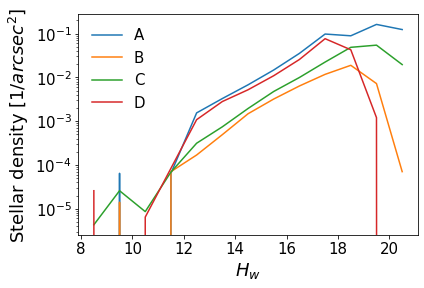

In [148]:
plt.plot(bins_add_A, n_A ,label="A")
plt.plot(bins_add_B, n_B ,label="B")
plt.plot(bins_add_C, n_C ,label="C")
plt.plot(bins_add_D, n_D ,label="D")
plt.legend(fontsize = 15, frameon = False)
plt.xlabel("$H_{w}$", fontsize = 18)
plt.ylabel("Stellar density [$1/arcsec^2$]", fontsize = 18) 
plt.yscale("log")
plt.tight_layout()
plt.savefig("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/fig/mag_seps_gns/A_D_stellar.png", dpi = 200)


In [155]:
test_stars = pd.read_csv("/Volumes/G-DRIVE/jasmine/working_dir/2022_1128/catalog/random_stars_A.csv")

<ipython-input-149-897ef68c845a>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-149-897ef68c845a>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_fig_head + "_dist.png", dpi = 200)
/opt/anaconda3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


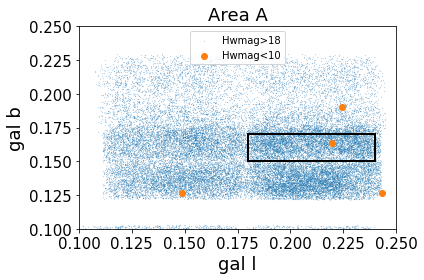

/opt/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


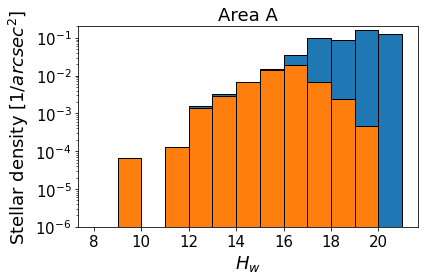

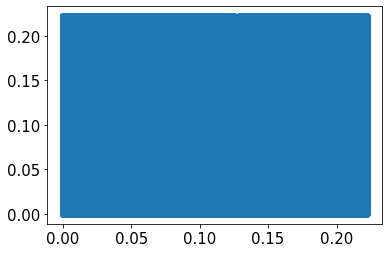

In [159]:
l_min_choose, l_max_choose, b_min_choose, b_max_choose= 0.18, 0.24, 0.15, 0.17
l_min_plot, l_max_plot, b_min_plot, b_max_plot =0.1, 0.25, 0.1, 0.25
file_fig_head = os.path.join(folder_out, "area_a_")
n_A, bins_add_A, catalog_stars_for_learn_A  = plot_zoom(catalog_shifted, l_min_plot, l_max_plot, b_min_plot, b_max_plot, l_min_choose, l_max_choose, b_min_choose,b_max_choose,  title="Area A", file_fig_head = file_fig_head, comp_catalog =ohsawa_catalog_shifted)


123
111


(0.15, 0.17)

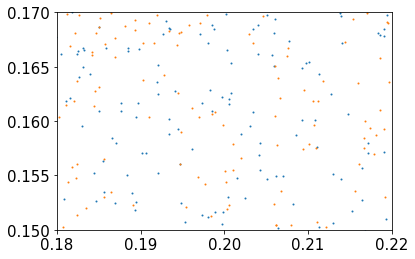

In [168]:
def count_stars(df,l_min_choose, l_max_choose,  b_min_choose, b_max_choose):

    mask = (df["gal_l"] > l_min_choose) * (df["gal_l"] < l_max_choose) * (df["gal_b"] > b_min_choose) * (df["gal_b"] < b_max_choose)
    return len(df[mask])

print(count_stars(test_stars[test_stars["hwmag"]<15],l_min_choose, 0.22,  b_min_choose, b_max_choose))
print(count_stars(catalog_stars_for_learn_A[catalog_stars_for_learn_A["hwmag"]<15],l_min_choose, 0.22,  b_min_choose, b_max_choose))

plt.scatter(test_stars["gal_l"][test_stars["hwmag"]<15], test_stars["gal_b"][test_stars["hwmag"]<15],s =1)
plt.scatter(catalog_stars_for_learn_A["gal_l"][catalog_stars_for_learn_A["hwmag"]<15], catalog_stars_for_learn_A["gal_b"][catalog_stars_for_learn_A["hwmag"]<15],s =1)
plt.xlim(l_min_choose, 0.22)
plt.ylim(b_min_choose, b_max_choose)

In [163]:
[catalog_stars_for_learn_A["hwmag"]<15]

,Unnamed: 0,ra,dec,hwmag,gal_l,gal_b
0,0,266.335566,-28.695225,15.949245,0.173919,0.177511
1,1,266.523019,-28.747158,20.101605,0.215210,0.010131
2,2,266.358056,-28.694415,17.885166,0.184897,0.161100
3,3,266.382605,-28.676674,15.136026,0.211263,0.151969
4,4,266.402323,-28.712211,19.678057,0.189947,0.118688
...,...,...,...,...,...,...
342152,342152,266.436881,-28.803114,19.005461,0.128133,0.045474
342153,342153,266.347136,-28.749062,15.617763,0.133273,0.140779
342154,342154,266.409897,-28.842576,19.591741,0.082133,0.045099
342155,342155,266.212276,-28.824957,18.601536,0.006847,0.201985
